In [3]:
from IPython.display import YouTubeVideo

<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">
# Intro to Big Data
Week 10 | Day 1

![](https://snag.gy/SZOEv2.jpg)

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- recognize big data problems
- explain how the map reduce algorithm works
- perform a map-reduce on a single node using python

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min | [Opening](#opening) | Opening |
| 20 min | [Introduction](#introduction) | Intro to Big Data |
| 20 min | [Guided-practice](#guided-practice) | Guided Practice: Word Count on paper |
| 20 min | [Demo](#demo) | MapReduce in python |
| 15 min | [Ind-practice](#ind-practice) | Independent practice |
| 5 min | [Conclusion](#conclusion) | Conclusion |

<a name="opening"></a>
## Opening (5 min)

Congratulations! You've made it to Week 10! This is the last full week of new content, and you already know a ton! Now it's time to think about some major trends in the field, including common tools and problems that data scientists may encounter. It is also time to take the tools you've learned to a new level by scaling up the size of datasets you can tackle. Today we start talking about Big Data!


<img src="https://snag.gy/mDzP4d.jpg" style="height: 300px">



## What do you think Big Data is?

<img src="http://www.lalampadina.net/magazine/wp-content/uploads/2014/02/NL25-5-conoscenza-misura-dei-big-data.gif">

<img src="http://cdn.makeuseof.com/wp-content/uploads/2012/07/data-layman-petabyte.jpg?004f0d">

<img src="https://65.media.tumblr.com/20e563427711aab595dff22f17d15549/tumblr_nxuhdl9AKY1ri1icuo1_500.png">

## Can you think of any datasets that would be "big data"?

## Exercise:

Take the next 5-10 minutes to find the largest dataset you can. We'll come back together to discuss.

## What challenges exist with such large amounts of data?

<a name="introduction"></a>
## What are the characteristics of big data?

Big data is a term used when the data exceeds the processing capacity of typical database. We need a big data analytics when the data grows quickly and we need to uncover hidden patterns, unknown correlations, and other useful information. There are three main features in big data (the 3 "V"s):
- **Volume**: Large amounts of data
- **Variety**: Different types of structured, unstructured, and multi-structured data
- **Velocity**: Needs to be analyzed quickly

<img src="https://lh4.googleusercontent.com/TtZC84rZOprmaRsGyd4N6BeQ9ryF47xkgGYl2piCGPjovbR9j-bX8MdvG2MVy8pTfEU06pIUbD1pMSsnHM58A3ObscVvbxElIzg8iIV4AKkbnzhsKxfP2_CWM67lTt399w">


## Two approaches to Big Data: 

1. High Performance Computing
2. Cloud

### High performance Computing
Supercomputers are very expensive, very powerful calculators used by researchers to solve complicated math problems.

[Top 500 Supercomputers](https://www.top500.org/lists/2016/06/)<br>
[What is a supercomputer anyway?](http://techland.time.com/2012/06/19/what-exactly-is-a-supercomputer/)

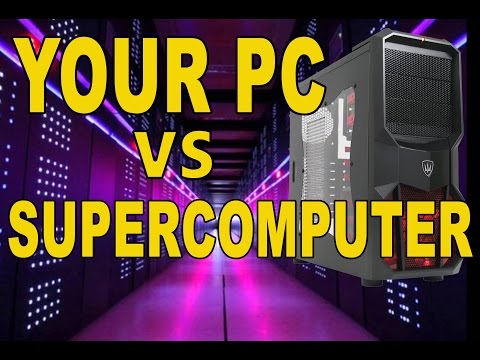

In [5]:
YouTubeVideo("HBpkSIJ9KwU")

## Can you think of advantages and disadvantages of this configuration?

### Cloud computing
Instead of one huge machine, what if we got a bunch of (commodity) machines and ran our tasks across them?

![commodity hardware](https://snag.gy/fNYgt0.jpg)<center>*Actual AWS Datacenter*</center>


## What is a commodity machine?

<img src="http://i.imgur.com/cSWts2V.png">

## Typical Specs

<img src="http://i.imgur.com/ksb6IXe.png">

## Check: Can you think of advantages and disadvantages of this cloud/distributed computing configuration?

* Comodity hardware is a term we used in operations to describe mixed server hardware but it can also refer to basic machines that you would use in an office setting as well. 


## The term Big Data refers to the latter case, where commodity hardware with unlimited scalability is used to solve highly parallelizable problems.

# How do you think many computers process data?
In contrast to how you would perform analysis on your laptop as we have so far?

# Parallelism

The foundation of Big Data processing, is the idea that a problem can be computed by multiple machines together.  This allows many resources to be used in "parallel".

![](https://snag.gy/MknIN6.jpg)

- Running multiple instances to process data
- Data can be subset and solved iteratively 
- Sub-solutions can be solved independently

### Divide and Conquer

<img src="https://snag.gy/xh2mJA.jpg">

Divide and conquer strategy is a fundamental algorithmic technique for solving a given task, whose steps include:

1. split task into subtasks
- solve these subtasks independently
- recombine the subtask results into a final result

The defining characteristic of a problem that is suitable for the divide and conquer approach is that it can be broken down into independent subtasks.

### Map-Reduce

<img src="https://snag.gy/XBgCOs.jpg">

## Now with sandwiches

<img src="http://hsto.org/files/fbc/33e/2b2/fbc33e2b26894055b3a2c8d5d272aebb.jpg">

## Map-Reduce

The term **Map Reduce** indicate a two-phase divide and conquer algorithm initially invented and publicized by Google in 2004. It involves splitting a problem into subtasks and processing these subtasks in parallel and it consists of two phases:

1. the **mapper** phase
- the **reducer** phase

In the **mapper phase**, data is split into chunks and the same computation is performed on each chunk, while in the **reducer phase**, data is aggregated back to produce a final result.

Map-reduce uses a functional programming paradigm.  The data processing primitives are mappers and reducers, as we’ve seen.

- **mappers** – filter & transform data
- **reducers** – aggregate results

The functional paradigm is good at describing how to solve a problem, but not very good at describing data manipulations (eg, relational joins).

### Key Value pairs

(note to self -- remake diagram)
<img src="https://snag.gy/k2FCar.jpg">

Data is passed through the various phases of a **map-reduce pipeline** as key-value pairs.

## Check: What python data structures could be used to implement a key value pair?

<a name="guided-practice"></a>
## Guided Practice: Word Count on paper (20 min)

Let's perform a simple map-reduce in the class, let's find the 10 most common words in the paragraph below.

    1:  MapReduce is a programming model for large-scale distributed data processing.
    3:  It is inspired by the map function and the reduce function of the functional
    4:  programming languages such as Lisp, Haskell, or Python. One of the most
    5:  important features of MapReduce is that it allows us to hide the low-level
    6:  implementation such as message passing or synchronization from users and
    7:  allows to split a problem into many partitions. This is a great way to make
    8:  trivial parallelization of data processing without any need for
    9:  communication between the partitions.
    10: MapReduce became main stream because of Apache Hadoop, which is an open
    11: source framework that was derived from Google's MapReduce paper.
    12: MapReduce allows us to process massive amounts of data in a distributed
    13: cluster. In fact, there are many implementations of the MapReduce
    14: programming model. Some of them are shown in the following list. It is
    15: important to say that MapReduce is not an algorithm; it is just a part
    16: of a high-performance infrastructure that provides a lightweight
    17: way to run a program in a lot of parallel machines.
    18:                from: Practical Data Analysis, Hector Cuesta, 2013


In [4]:
line = 'of a high-performance infrastructure that provides a lightweight'

line = line.lower()
line = line.replace('-', ' ')
line = line.split()

In [11]:
new_set = set([x for x in line])
print new_set

set(['a', 'infrastructure', 'that', 'of', 'high', 'provides', 'lightweight', 'performance'])


In [14]:
for i in new_set:
    count = 0
    for j in line:
        if i== j:
            count += 1
        
    print (i, count)

('a', 2)
('infrastructure', 1)
('that', 1)
('of', 1)
('high', 1)
('provides', 1)
('lightweight', 1)
('performance', 1)


### Simple Map reduce

We will do this as follows:
- Students will perform the mapper function
- Instructor will perform the reducer function

Each student will be assigned 1 line of text, and you have to produce a list of key value pairs `(word, 1)` and hand those to the instructor. 

**Check:** what pre-processing should you do your tokens in order to improve the results?


Example: the first line will produce this list:

    (mapreduce, 1)
    (is, 1)
    (a, 1)
    (programming, 1)
    (model, 1)
    (for, 1)
    (large-scale, 1)
    (distributed, 1)
    (data, 1)
    (processing, 1)

The instructor will then sort them, add up the `1`s for each word and produce the counts.


**Check:** what additional operation did the instructor perform in order to complete the aggregation?



### Combiners

Combiners are intermediate reducers that are performed at node level in a multi node architecture.

![](https://snag.gy/lFYfoC.jpg)

When data is really large we will distribute it to several mappers running on different machines. Sending a long list of `(word, 1)` pairs to the reducer node is not efficient. We can first aggregate at mapper node level and send the result of the aggregation to the reducer. This is possible because aggregations are associative.

Let's repeat the exercise we did before, with a small change.

1.Let's divide the class in 3 groups, in each group one student will be the combiner, the others will be mappers.
- Let's split the text in 3 parts and each group gets one part
- Mapper students produce the same list of `(word, 1)` for each line they receive and hand the list to the combiner
- Combiner students sort the lists and sum the counts for words that appear in each list
- Finally combiner students hand their list of counts to the instructor who will combine the intermediate sums and produce the final result

**Check:** What changed?



**Check:** Can you think of other aggregation tasks that can be parallelized in this way?


<a name="demo"></a>
## MapReduce in python (20 min)

Now that we performed map-reduce in person, let's do it in python. Below you can find the code for a simple mapper and reducer that perform the word count.

Let's look at them in detail.

### Mapper.py


In [15]:
# mapper.py
import sys

# get text from standard input
for line in sys.stdin:
    line = line.strip()
    words = line.split()
    for word in words:
        print '%s\t%s' % (word, 1)

**Check:** What kind of input does `mapper.py` expect?

**AND** what kind of output does `mapper.py` produce?

### Reducer.py

In [8]:
# reducer.py
import sys

current_word = None
current_count = 0
word = None

# input comes from STDIN
for line in sys.stdin:
    line = line.strip()
    word, count = line.split('\t', 1)
    
    # try to count, if error continue
    try:
        count = int(count)
    except ValueError:
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            print '%s\t%s' % (current_word, current_count)
        current_count = count
        current_word = word

# do not forget to output the last word if needed!
if current_word == word:
    print '%s\t%s' % (current_word, current_count)

None	0


**Check:** what kind of input does `reducer.py` expect?

**Check:** what kind of output does `reducer.py` produce?

The code can be run with the following command from terminal:

```bash
cat <input-file> | python mapper.py | sort -k1,1 | python reducer.py
```

**Check:** can you explain what each of the 4 steps in the pipe does?

**Check:** can you find how our previous example *could* be represented in the diagram below?
<img src="http://i.imgur.com/SghGtej.png">

<a name="ind-practice"></a>
## Independent practice (15 min)

Now that you have a basic word count set up in python, try doing some of the following:

- process a much larger text file (you can download it from internet)
> for example a page from wikipedia or a blog article. If you're really ambitious you can take books from project gutemberg.
- try to see how the execution time scales with file size
- read [this article](http://aadrake.com/command-line-tools-can-be-235x-faster-than-your-hadoop-cluster.html) for some very powerful shell tricks.  Learning to use the shell will save you tons of time munging data on your filesystem.

<a name="conclusion"></a>
## Conclusion (5 min)
In this class we have learned about Big Data and map-reduce. This is an algorithm that works really well for aggregations on very large datasets.

Some specific business applications:
- process log files to find security breaches
- process medical records to assess spending
- process news articles to decide on investments

### ADDITIONAL RESOURCES

- [Top 500 Supercomputers](http://www.top500.org/lists/)
- [Google Map Reduce paper](http://research.google.com/archive/mapreduce.html)